# 은행

## 상품가입고객 예측 및 타겟 마케팅

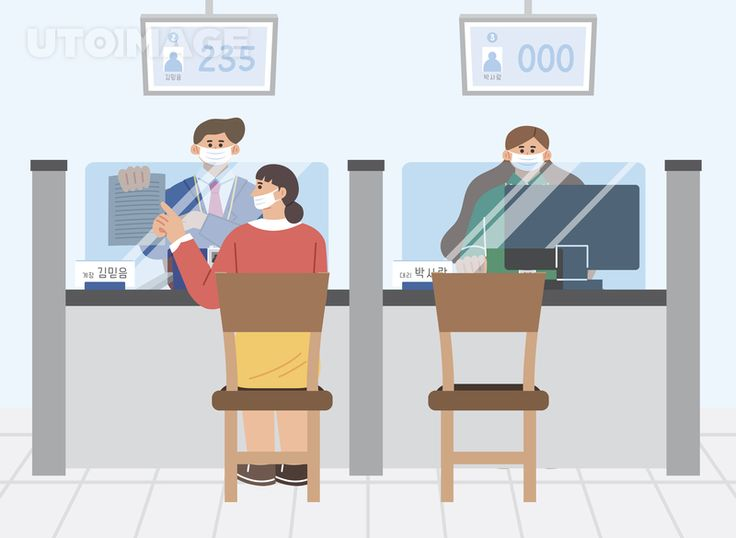

### 📖 목차
- 비즈니스 시나리오
- EDA
- Classification (분류) 예측

### 💼 비즈니스 시나리오

최근 주식, 코인 투자가 열풍이 불면서 A은행의 정기예금 가입자가 감소하고 있다. <br>
정기예금 가입률이 높았을 때는 Mass 마케팅 형식으로 홍보를 해도 투자 대비 효율이 좋았지만 <br> 
현재는 가입률이 떨어지고 있기 때문에 마케팅 비용 투자 대비 효율이 감소하고 있는 상황이다. <br>
마케팅 비용을 줄이기 위해 정기예금 가입 가능성이 높은 고객군을 추출하고 타겟 마케팅을 수행하고자 한다.

#### 🔎 문제 정의

정기예금 가입자 감소, 마케팅 비용 투자 대비 효율 저조

#### ✨ 기대 효과

정기예금 가입률 증가, 마케팅 비용 투자 대비 효율 증대

#### ✔️ 해결 방안

정기예금 가입 가능성이 높은 타겟 고객군 추출 및 대상 마케팅

#### 🗝️ 성과 측정

대조군 대비 타겟 고객군 정기예금 가입률

#### ⚙️ 운영

- 매 월 Data mart 생성 후 Model을 활용하여 타겟 고객군 추출
- 마케팅 후 대조군과 비교를 통해 마케팅 효과 모니터링

### 🗂️ DATA
- 고객마다 과거 진행한 캠페인(마케팅)에 대한 이력과, 현재 캠페인에서 수행된 데이터가 존재
- duration은 예측시 제외 (※ 통화 시간에 따라 Y(가입여부) 결정되므로 제외)
* 데이터 명세 ⬇

|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|나이|직업|결혼|교육|신용카드|주택|대출|연락처|마지막 연락 월|마지막 연락 요일|통화시간|캠페인 기간동안 고객연락횟수|이전 캠페인 연락 후 지난일|  

|previous|poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr,employed|y|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|현재 캠페인 전에 연락횟수|이전 마케팅 결과|고용 변동률|소비자 물가 지수|소비자 신뢰 지수|유리보 3개월 비율|직원수|정기예금 가입여부|

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('./S_PJT03_DATA.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 📍 EDA - 고객 프로필 조건에 따른 가입률 비교

#### 1. 데이터 전처리

* **데이터 기본 정보 확인**
    - Data Shape(형태) 확인
    - Data Type 확인
    - Null값 확인
    - Outlier 확인

In [5]:
# Data Shape
df.shape

(41188, 21)

In [6]:
# Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Null값 확인
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# Outlier 확인, 음수값 확인
pd.DataFrame(df.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
# 정기예금 가입여부 value counts
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [12]:
# 평균 정기예금 가입률 11%
4640 / (36548+4640)

0.11265417111780131

#### 2. Categorical (범주형) 변수 파악

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
# numerical data dtype
df['age'].dtype

dtype('int64')

In [16]:
# categorical data dtype
df['job'].dtype

dtype('O')

In [17]:
# numerical, categorical data 나누기

numerical_list = []
categorical_list = []

for i in df.columns:
    if df[i].dtype == 'O':
        categorical_list.append(i)
    else:
        numerical_list.append(i)

print("numerical_list :", numerical_list)
print("categorical_list :", categorical_list)

numerical_list : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_list : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


(array([0, 1, 2]),
 [Text(0, 0, 'nonexistent'), Text(1, 0, 'failure'), Text(2, 0, 'success')])

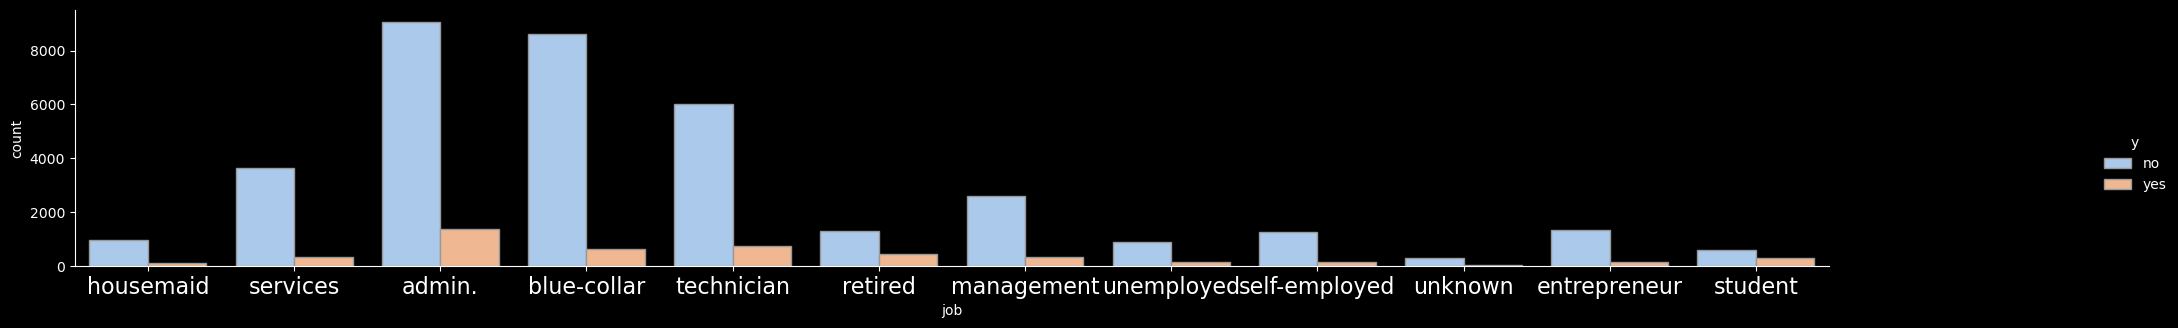

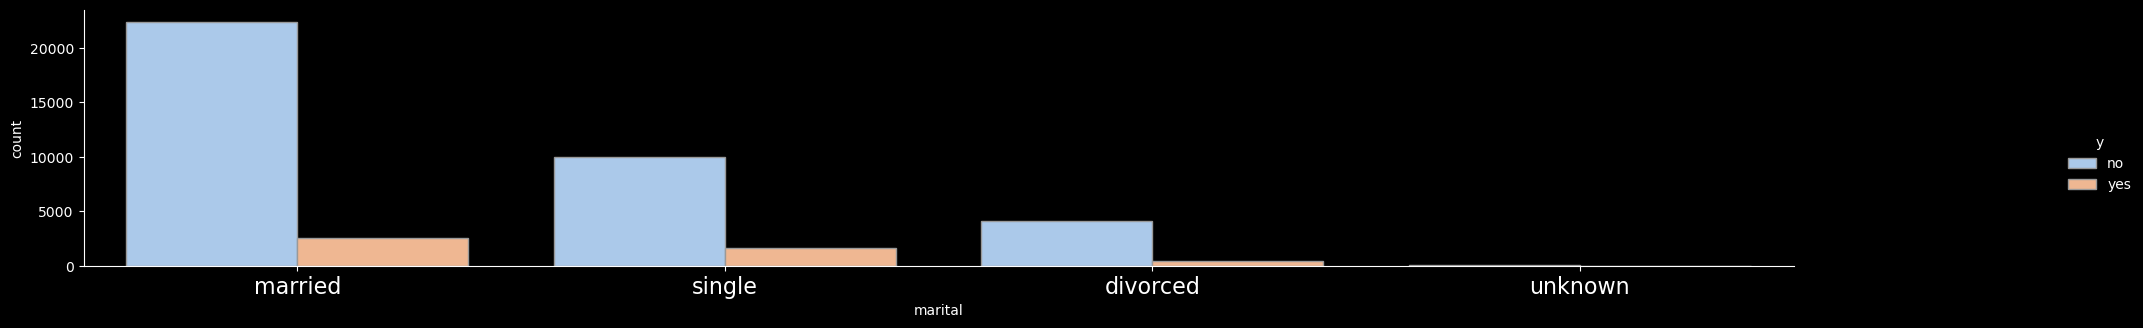

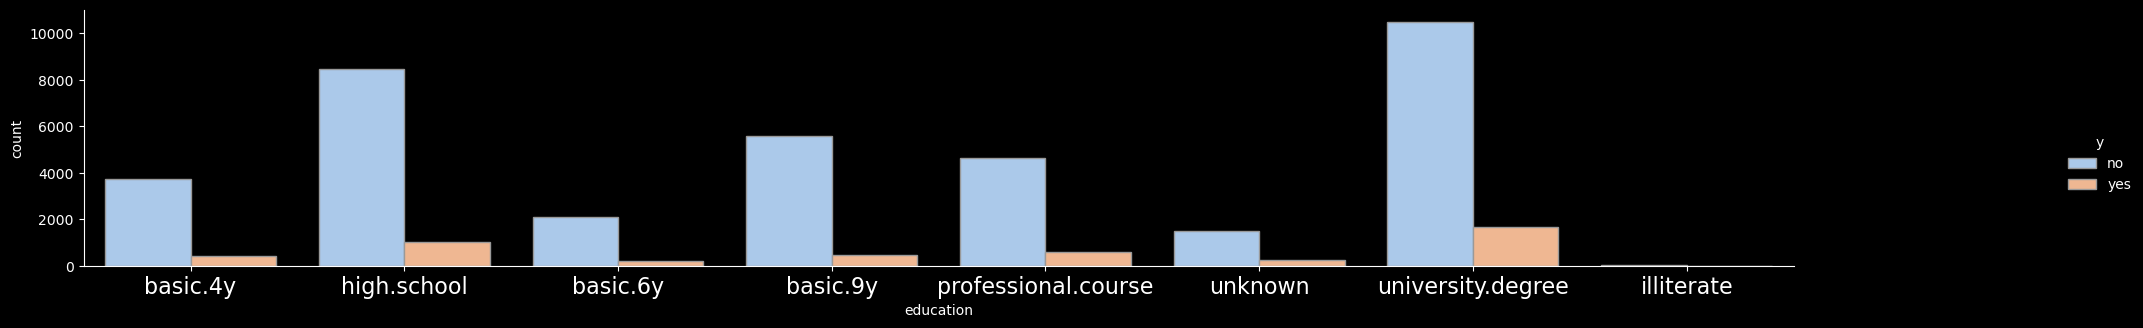

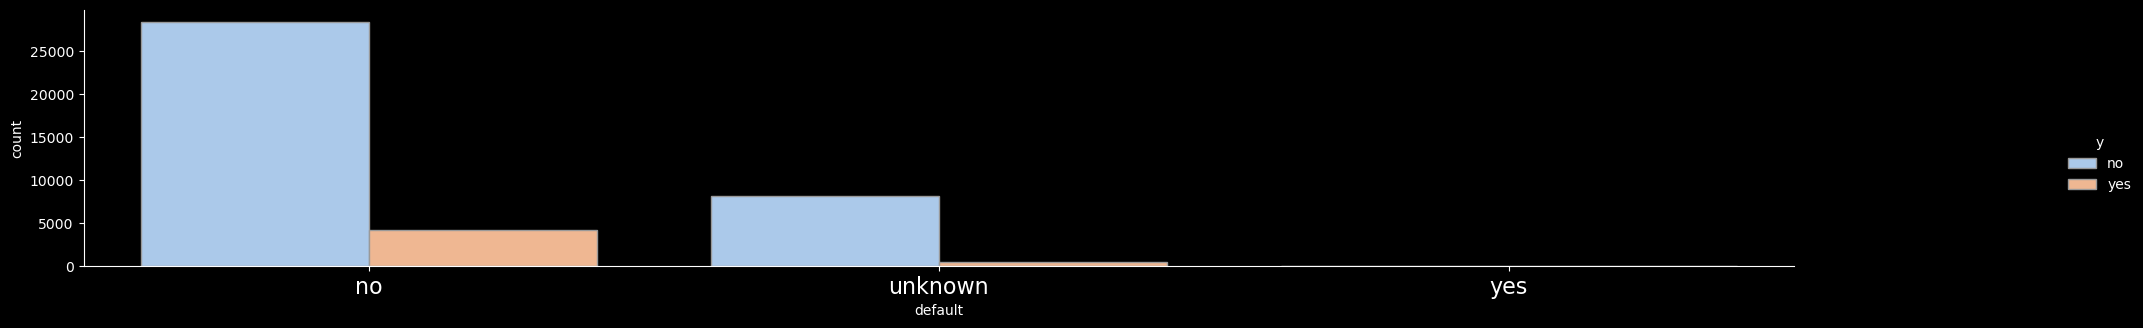

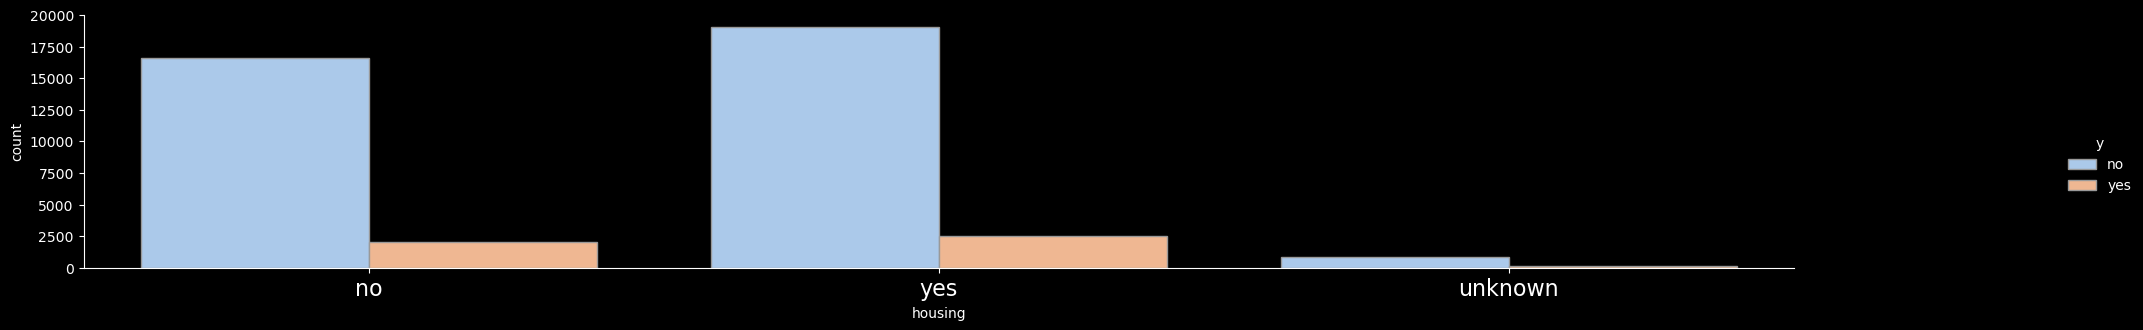

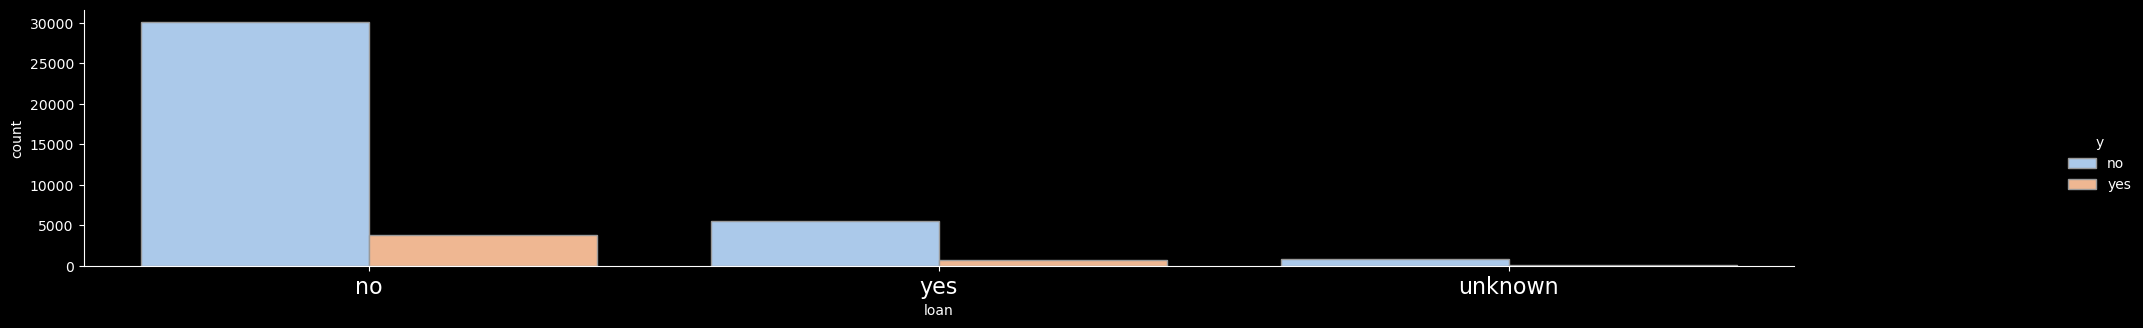

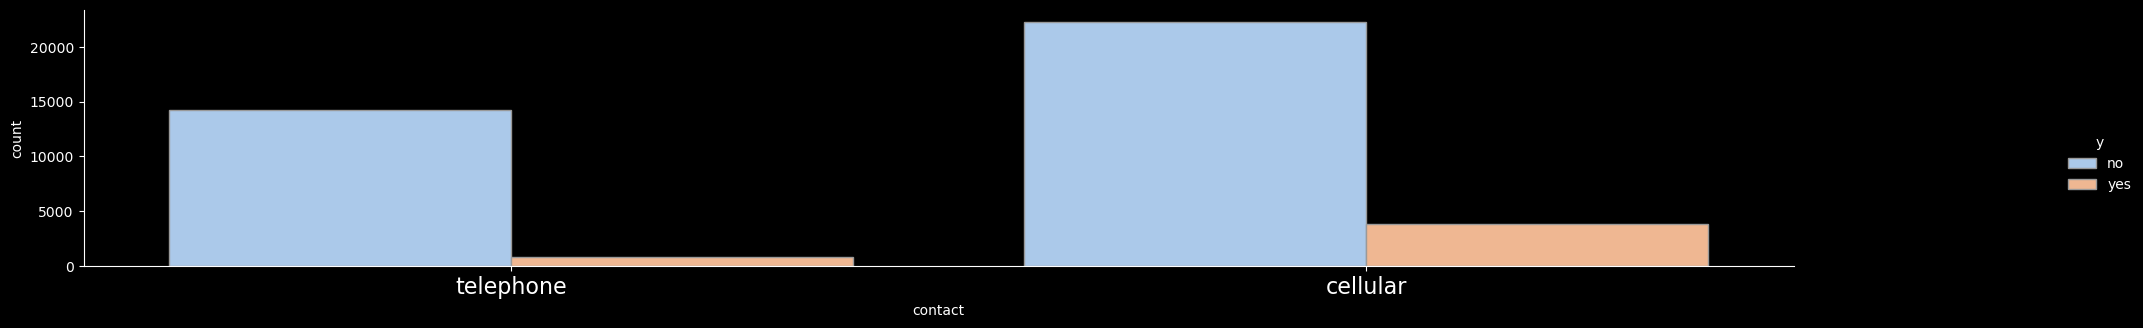

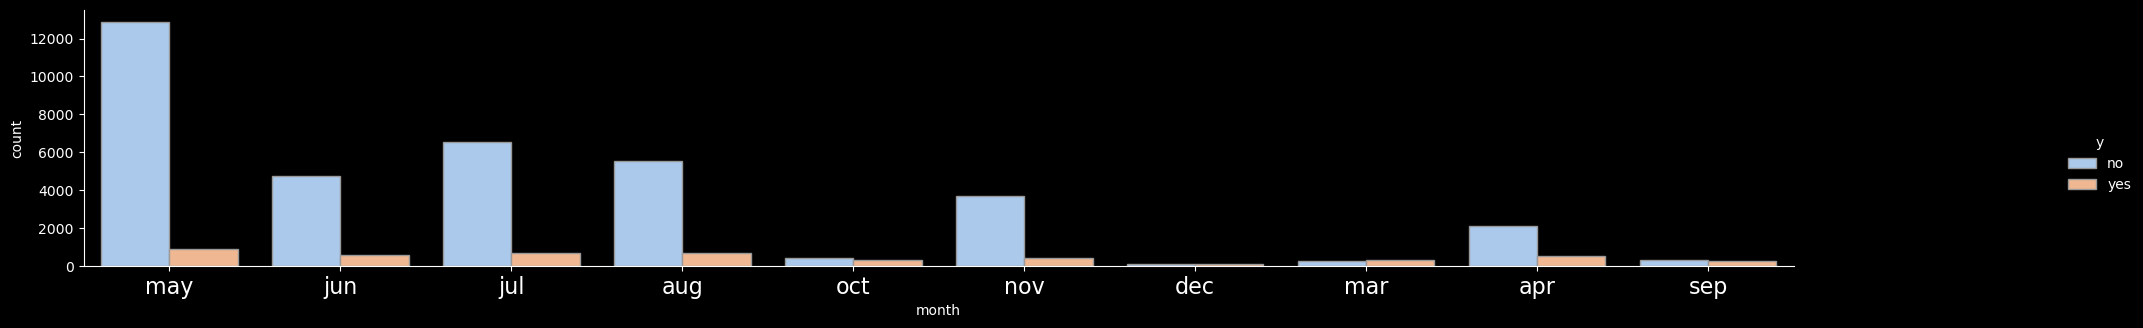

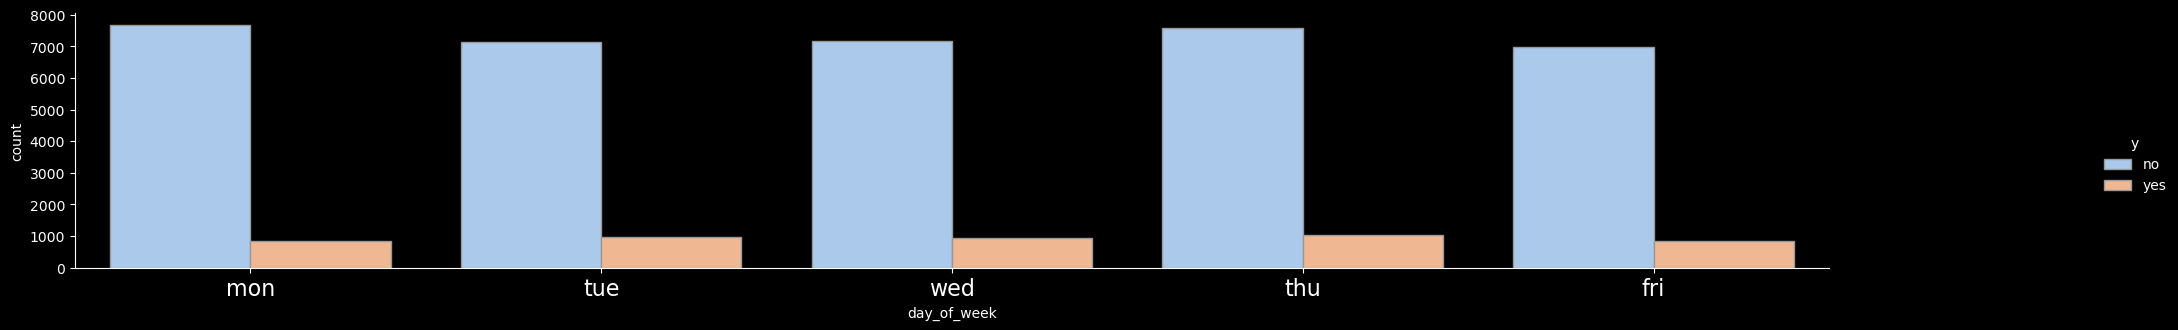

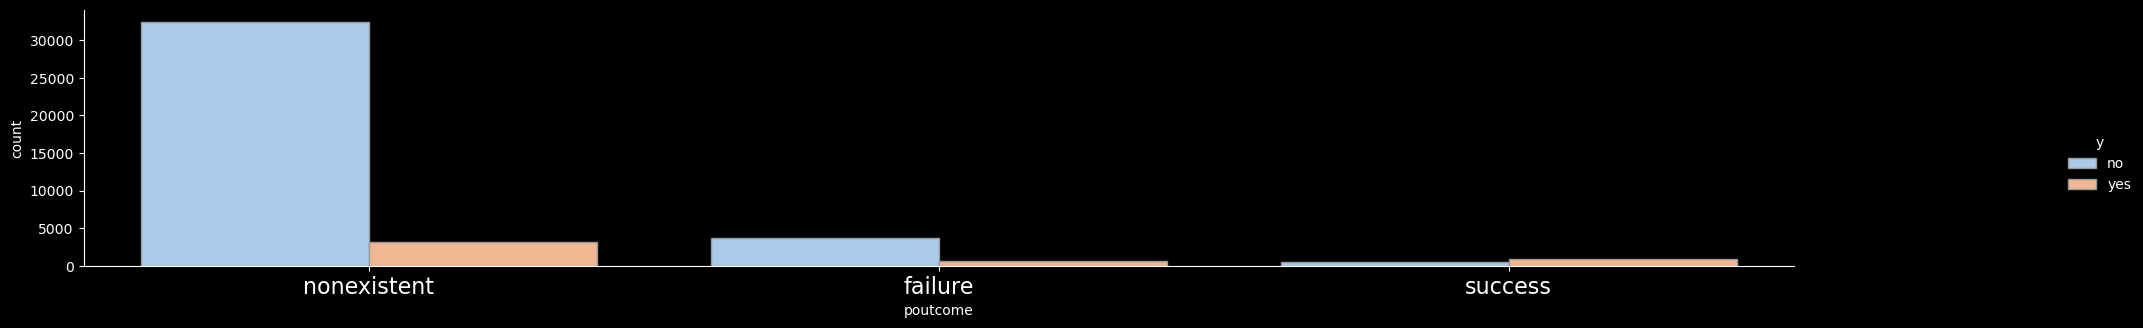

In [17]:
# Categorical 변수의 구성형태와 정기예금 가입 상황
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="job", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="marital", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="education", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="default", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="housing", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="loan", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="contact", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="month", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="day_of_week", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="poutcome", hue="y", kind="count", palette="pastel", edgecolor=".6", data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

### 📍 Rule base 기반 상품 가입 예측